# Importing libraries

In [117]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

# Data Preprocessing and Loading for MNIST Dataset with PyTorch

In [94]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

mnist = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(mnist, batch_size=32, shuffle=True)

# Generator Class

In [95]:
class Generator(nn.Module):
  def __init__(self):
    super(Generator,self).__init__()

    self.main = nn.Sequential(
            nn.Linear(100, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

  def forward(self,z):
    output = self.main(z)
    return output.view(z.size(0),1,28,28)

# Discriminator Class

In [96]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.main = nn.Sequential(
            nn.Linear(784, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input.view(input.size(0),784))


# Creating object

In [105]:
generator = Generator()
discriminator = Discriminator()

# Defining loss function and optimizer

In [ ]:
criterion = nn.BCELoss()
optim_d = optim.Adam(discriminator.parameters(),0.0002)
optim_g = optim.Adam(generator.parameters(),0.0002)

# Training GAN

In [113]:
n_epochs = 20

real_labels = torch.ones(32, 1)
fake_labels = torch.zeros(32, 1)


for epoch in range(n_epochs):
    # discriminator training
    for batch, _ in dataloader:
        # discriminator real images training
        optim_d.zero_grad()
        output = discriminator(batch)
        disc_real_loss = criterion(output, real_labels)

        # discriminator fake images training
        noise = torch.randn(32, 10 * 10)
        fake_batch = generator(noise)
        output = discriminator(fake_batch.detach())
        disc_fake_loss = criterion(output, fake_labels)

        disc_loss = disc_fake_loss + disc_real_loss
        disc_loss.backward()
        optim_d.step()

        # generator training
        optim_g.zero_grad()
        noise = torch.randn(32, 10 * 10)
        fake_batch = generator(noise)
        output = discriminator(fake_batch)
        gen_loss = criterion(output, real_labels)
        gen_loss.backward()
        optim_g.step()

    print(f'Epoch:{epoch}, Discriminator_loss: {disc_fake_loss + disc_real_loss}, Generator_loss: {gen_loss}')

Epoch:0, Discriminator_loss: 1.097825050354004, Generator_loss: 0.9276012182235718
Epoch:1, Discriminator_loss: 0.9742084741592407, Generator_loss: 1.2255464792251587
Epoch:2, Discriminator_loss: 1.266139268875122, Generator_loss: 1.2216918468475342
Epoch:3, Discriminator_loss: 1.1994036436080933, Generator_loss: 0.9024251699447632
Epoch:4, Discriminator_loss: 1.1332719326019287, Generator_loss: 1.224892497062683
Epoch:5, Discriminator_loss: 1.1851916313171387, Generator_loss: 1.0735422372817993
Epoch:6, Discriminator_loss: 1.0831258296966553, Generator_loss: 1.0055886507034302
Epoch:7, Discriminator_loss: 1.178454875946045, Generator_loss: 1.0651556253433228
Epoch:8, Discriminator_loss: 1.1258866786956787, Generator_loss: 1.2214587926864624
Epoch:9, Discriminator_loss: 1.2862558364868164, Generator_loss: 1.0032947063446045
Epoch:10, Discriminator_loss: 1.2620348930358887, Generator_loss: 0.8021720051765442
Epoch:11, Discriminator_loss: 1.3360596895217896, Generator_loss: 0.90667140483

# Visualizing the generated handwriting numbers

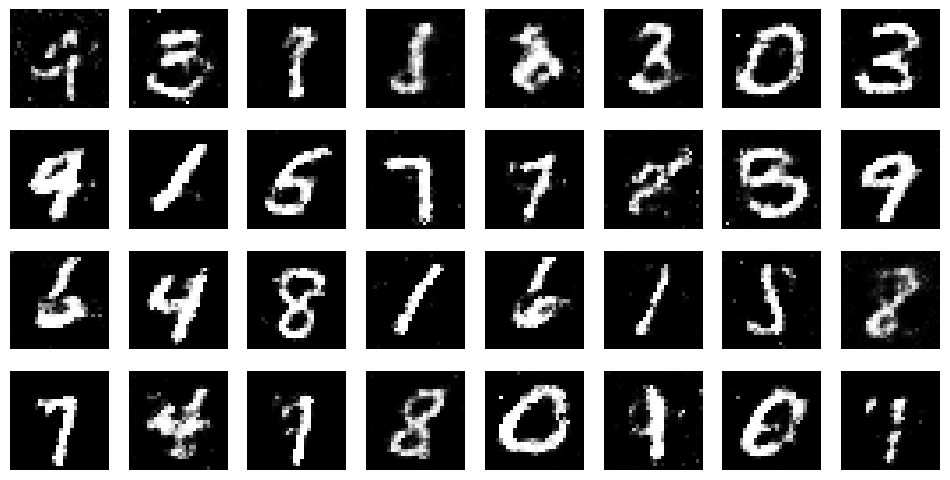

In [115]:
z = torch.randn(32, 100)
fake_imgs = generator(z)

# Move the images to the CPU and convert to numpy array
fake_imgs = fake_imgs.detach().numpy()

# Create a grid of images
fig, axs = plt.subplots(4, 8, figsize=(12, 6), sharey=True, sharex=True)

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(fake_imgs[i * 8 + j][0], cmap='gray')
        axs[i, j].axis('off')

plt.show()